In [220]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
df=pickle.load(open('htautau.pkl','rb'))

In [221]:
#df.keys()

In [222]:
df['DYJetsToLL'].keys()

Index(['njets', 'npv', 'pt_1', 'eta_1', 'phi_1', 'm_1', 'iso_1', 'q_1', 'mt_1',
       'pt_2', 'eta_2', 'phi_2', 'm_2', 'iso_2', 'q_2', 'mt_2', 'dm_2',
       'jpt_1', 'jeta_1', 'jphi_1', 'jm_1', 'jbtag_1', 'jpt_2', 'jeta_2',
       'jphi_2', 'jm_2', 'jbtag_2', 'pt_met', 'phi_met', 'm_vis', 'pt_vis',
       'mjj', 'ptjj', 'jdeta', 'gen_match', 'run', 'weight'],
      dtype='object')

In [223]:
ds = {}
for k in df.keys():
    ds[k] = df[k].loc[  (df[k].q_1 * df[k].q_2 < 0) 
                        #& (df[k].iso_1<0.05)
                        #& (df[k].mt_1<30) 
                        #& (df[k].njets>0) 
                        #& (df[k].jpt_1>35)
                        #& (df[k].pt_met + df[k].pt_vis>20)
                        ]


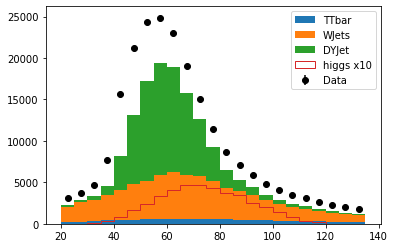

In [224]:
var = 'm_vis' # try out different keys at home
bins =  range(20,140,5)
binCenters=[(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]
"""
Index(['njets', 'npv', 'pt_1', 'eta_1', 'phi_1', 'm_1', 'iso_1', 'q_1', 'mt_1',
       'pt_2', 'eta_2', 'phi_2', 'm_2', 'iso_2', 'q_2', 'mt_2', 'dm_2',
       'jpt_1', 'jeta_1', 'jphi_1', 'jm_1', 'jbtag_1', 'jpt_2', 'jeta_2',
       'jphi_2', 'jm_2', 'jbtag_2', 'pt_met', 'phi_met', 'm_vis', 'pt_vis',
       'mjj', 'ptjj', 'jdeta', 'gen_match', 'run', 'weight'],
      dtype='object')
"""
dyset       = ds['DYJetsToLL'][var].to_list()
dyweight    = ds['DYJetsToLL']['weight'].to_list()
gluset      = ds['GluGluToHToTauTau'][var].to_list()
gluweight   = ds['GluGluToHToTauTau']['weight'].to_list()
ttset       = ds['TTbar'][var].to_list()
ttweight    = ds['TTbar']['weight'].to_list()
vbfset      = ds['VBF_HToTauTau'][var].to_list()
vbfweight   = ds['VBF_HToTauTau']['weight'].to_list()

wset = sum([ds[i][var].to_list() for i in ['W1JetsToLNu', 'W2JetsToLNu','W3JetsToLNu']],[])
wweight = sum([ds[i]['weight'].to_list() for i in ['W1JetsToLNu', 'W2JetsToLNu','W3JetsToLNu']],[])

runset = ds['Run2012B_TauPlusX'][var].to_list() + ds['Run2012C_TauPlusX'][var].to_list() # kaalud on üks
runweights = np.ones(len(runset))
hset=sum([ds[i][var].to_list()for i in ['GluGluToHToTauTau', 'VBF_HToTauTau']],[])
hw=sum([ds[i]['weight'].to_list()for i in ['GluGluToHToTauTau', 'VBF_HToTauTau']],[])

#plt.hist([dyset,wset],weights=[dyweight,wweight],stacked=True, bins=range(20,140,5))   # esimene mis antakse läheb allapoole
plt.hist(   [ttset,wset,dyset],
            weights=[ttweight,wweight,dyweight],
            stacked=True, bins=bins, label=('TTbar','WJets','DYJet'))    # natuke parem graafik
dd=np.histogram(runset,bins=bins)
plt.errorbar(binCenters,dd[0],yerr=np.sqrt(dd[0]),fmt='o',c='black',label='Data')
plt.hist(hset,weights=[10*i for i in hw], histtype=u'step',bins=bins, label='higgs x10')
plt.legend()


In [225]:
df.keys()

dict_keys(['Run2012B_TauPlusX', 'DYJetsToLL', 'GluGluToHToTauTau', 'TTbar', 'W1JetsToLNu', 'W2JetsToLNu', 'VBF_HToTauTau', 'Run2012C_TauPlusX', 'W3JetsToLNu'])

In [226]:
def plotdat(inp_var,bins_new):
    #var = 'm_vis' # try out different keys at home
    #bins_new =  np.arange(0,0.3,0.01)
    binCenters=[(bins_new[i]+bins_new[i+1])/2 for i in range(len(bins_new)-1)]
    dyset       = ds['DYJetsToLL'][inp_var].to_list()
    dyweight    = ds['DYJetsToLL']['weight'].to_list()
    gluset      = ds['GluGluToHToTauTau'][inp_var].to_list()
    gluweight   = ds['GluGluToHToTauTau']['weight'].to_list()
    ttset       = ds['TTbar'][inp_var].to_list()
    ttweight    = ds['TTbar']['weight'].to_list()
    vbfset      = ds['VBF_HToTauTau'][inp_var].to_list()
    vbfweight   = ds['VBF_HToTauTau']['weight'].to_list()
    
    wset = sum([ds[i][inp_var].to_list() for i in ['W1JetsToLNu', 'W2JetsToLNu','W3JetsToLNu']],[])
    wweight = sum([ds[i]['weight'].to_list() for i in ['W1JetsToLNu', 'W2JetsToLNu','W3JetsToLNu']],[])
    
    runset = ds['Run2012B_TauPlusX'][inp_var].to_list() + ds['Run2012C_TauPlusX'][inp_var].to_list() # kaalud on üks
    runweight = np.ones(len(runset))
    hset=sum([ds[i][inp_var].to_list()for i in ['GluGluToHToTauTau', 'VBF_HToTauTau']],[])
    hw=sum([ds[i]['weight'].to_list()for i in ['GluGluToHToTauTau', 'VBF_HToTauTau']],[])
    
    #plt.hist([dyset,wset],weights=[dyweight,wweight],stacked=True, bins=range(20,140,5))   # esimene mis antakse läheb allapoole
    fig = plt.figure()
    ax = fig.add_subplot()
    plt.title(inp_var)
    #plt.hist([dyset,wset],weights=[dyweight,wweight],stacked=True, bins=range(20,140,5))   # esimene mis antakse läheb allapoole
    plt.hist(   [ttset,wset,dyset],
                weights=[ttweight,wweight,dyweight],
                stacked=True, bins=bins_new, label=('TTbar','WJets','DYJet'))     # natuke parem graafik
    #dd=np.histogram(runset,bins=bins_new)
    #plt.errorbar(binCenters,dd[0],yerr=np.sqrt(dd[0]),fmt='o',c='black',label='Data')
    plt.hist(hset,weights=[10*i for i in hw], histtype=u'step',bins=bins_new, label='higgs x10')
    plt.legend()
    

In [227]:
df['DYJetsToLL'].keys()

Index(['njets', 'npv', 'pt_1', 'eta_1', 'phi_1', 'm_1', 'iso_1', 'q_1', 'mt_1',
       'pt_2', 'eta_2', 'phi_2', 'm_2', 'iso_2', 'q_2', 'mt_2', 'dm_2',
       'jpt_1', 'jeta_1', 'jphi_1', 'jm_1', 'jbtag_1', 'jpt_2', 'jeta_2',
       'jphi_2', 'jm_2', 'jbtag_2', 'pt_met', 'phi_met', 'm_vis', 'pt_vis',
       'mjj', 'ptjj', 'jdeta', 'gen_match', 'run', 'weight'],
      dtype='object')

In [228]:
#bins_njets = range(10)
#plotdat('njets', bins_njets)    #bins = range(10)

In [229]:
#bins_iso_1 = np.arange(0,0.3,0.01)
#plotdat('iso_1', bins_iso_1) # 0,0.3,0.01

In [230]:
#bins_mt_1 = range(100)
#plotdat('mt_1',bins_mt_1)

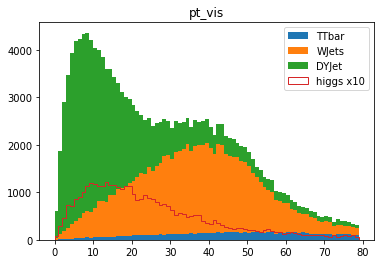

In [231]:
bins_pt_vis = range(80)
plotdat('pt_vis',bins_pt_vis)

In [232]:
# All in one, for no reason
#for i in df['DYJetsToLL'].keys():
#    #print(i)
#    plotdat(i)

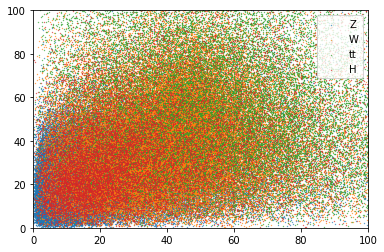

In [233]:
"""var1 = 'pt_vis'
var2 = 'pt_met'
dyset1 = ds['DYJetsToLL'][var1].to_list()
ttset1 = ds['TTbar'][var1].to_list()
wset1 = sum([ds[i][var1].to_list() for i in ['W1JetsToLNu', 'W2JetsToLNu','W3JetsToLNu']],[])
hset1 = sum([ds[i][var1].to_list()for i in ['GluGluToHToTauTau', 'VBF_HToTauTau']],[])

dyset2 = ds['DYJetsToLL'][var2].to_list()
ttset2 = ds['TTbar'][var2].to_list()
wset2= sum([ds[i][var2].to_list() for i in ['W1JetsToLNu', 'W2JetsToLNu','W3JetsToLNu']],[])
hset2= sum([ds[i][var2].to_list()for i in ['GluGluToHToTauTau', 'VBF_HToTauTau']],[])
S = 0.1
plt.scatter(dyset1,dyset2,label='Z',    s=S)
plt.scatter(wset1,wset2,label='W',      s=S)
plt.scatter(ttset1,ttset2,label='tt',   s=S)
plt.scatter(hset1,hset2,label='H',      s=S)
plt.xlim(0,100)
plt.ylim(0,100)
plt.legend()"""

